# Project
# Netflix Data: Cleaning, Analysis and Visualization
**--A Complete End-to-End Analysis of Netflix Titles Using Python--**

**Domain:** Data Analyst & Data scientist

## Introduction:
This project focuses on analyzing the Netflix Movies and TV Shows dataset using Python. The goal is to clean the data, explore key patterns, and generate meaningful insights about Netflix content. Through data cleaning, exploratory data analysis (EDA), and feature engineering, we understand trends like content types, durations, release patterns, ratings, and genre combinations. This helps us clearly see how Netflix has evolved over the years and what kind of content it mostly provides.

## Objectives:
The main objective of this project is to clean and analyse the Netflix dataset to understand the type of content available on the platform. I want to explore how many movies and TV shows are there, how their durations vary, which genres are common, what ratings are popular, and how Netflix has added content over time. I also created new features like number of genres, content age, and duration number to get deeper insights. Overall, the goal is to understand Netflix content trends using data cleaning, EDA, feature engineering, and visualizations.

## Tools:
**Python** – Main language for data cleaning and analysis.

**Pandas** – Used for data manipulation and cleaning.

**NumPy** – Used for numerical operations.

**Matplotlib** – Used to create visualizations.

**Seaborn** – Used for advanced and stylish charts.

**YData Profiling** – Used to generate automatic data profiling report.

## Dataset Description:
**1. show_id**- Unique ID given to each Netflix title.

**2. type**- Specifies whether the content is a Movie or TV Show.

**3. title**- Name of the movie or TV show.

**4. director**- Name of the director(s). Some titles may have empty values if the director is not available.

**5. country**- Country/countries where the title was produced.

**6. date_added**- The exact date when the movie or show was added to Netflix.

**7. release_year**- The year in which the movie/show was originally released.

**8. rating**- Content rating like TV-MA, TV-14, PG, R, etc., which shows age eligibility.

**9. duration**- For movies → duration in minutes
                 For TV Shows → number of seasons

**10. listed_in**- Genres/categories of the title. Multiple genres are separated by commas.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Loading:

In [4]:
df= pd.read_csv(r"C:\Users\sathv\Downloads\netflix1 (2).csv")

In [3]:
df.head()


show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movies, Comedies  
4   Dramas, Independent Movies, International Movies

In [4]:
df.describe()

release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


## Data Cleaning / Data Preprocessing
## Checking Missing values:  

In [6]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

## Checking how many Rows & Colomns

In [7]:
df.shape

(8790, 10)

## Remove duplicates:

In [8]:
df.drop_duplicates(inplace=True)


In [9]:
df['date_added'] = pd.to_datetime(df['date_added'])


In [10]:
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day


In [11]:
df[['date_added', 'year', 'month', 'day']].head()


date_added  year  month  day
0 2021-09-25  2021      9   25
1 2021-09-24  2021      9   24
2 2021-09-24  2021      9   24
3 2021-09-22  2021      9   22
4 2021-09-24  2021      9   24

In [12]:
df = df.dropna()

In [13]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
year                     int32
month                    int32
day                      int32
dtype: object

## Importing ydata_profiling as pf

In [14]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [15]:
from ydata_profiling import ProfileReport

In [16]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                           | 0/13 [00:00<?, ?it/s]
%|██████▍                                                                            | 1/13 [00:00<00:04,  2.65it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 26.34it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

After completing the data cleaning process, I generated a data profiling report using YData Profiling.
This report helped me understand the cleaned Netflix dataset in a detailed and easy way.

From the profiling report, I observed the following:

**--All duplicate rows were removed during cleaning.**

**--Missing values in director, cast, and country were fixed, so now these columns are complete.**

**--The duration column has mixed formats like “90 min” and “1 Season”, which means I need to do extra feature engineering later.**

**--date_added converted correctly into datetime format after cleaning.**

**--Most of the columns are categorical and have high variety, especially title, cast, and listed_in.**

**--There are no numeric correlations because almost all columns are text-based.**

**--The data is well distributed between Movies and TV Shows.**

Overall, the profiling report confirmed that the dataset is properly cleaned and ready for visualization and deeper EDA.
It also helped me decide what transformations and analysis to perform next.

# Exploratory Data Analysis

# 1. Movie vs TV Show Distribution

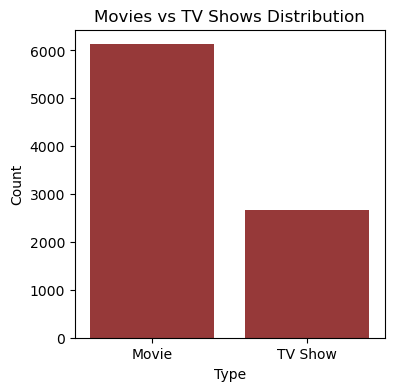

In [8]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(4,4))
sns.barplot(x=type_counts.index, y=type_counts.values,color="brown")
plt.title("Movies vs TV Shows Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
plt.savefig('Movie_vs_TV_Show.png', bbox_inches='tight',dpi=300)
plt.close()

**This chart shows that Netflix has more movies than TV shows. Movies are added in large numbers compared to shows,indicating movies dominate the platforms.**

# 2.Movie Duration Analysis

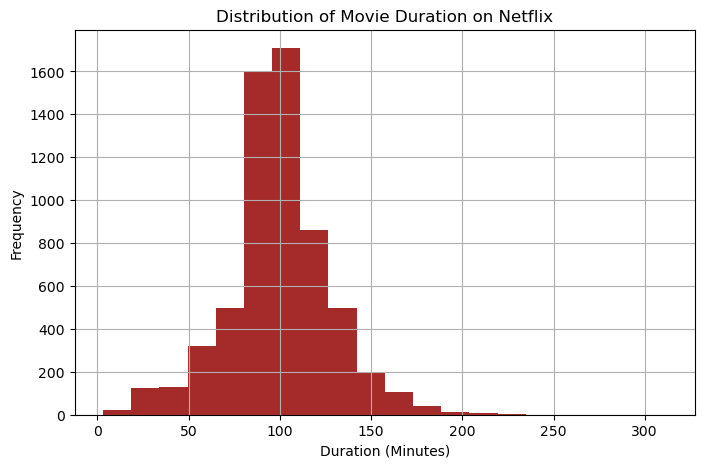

In [38]:
# Filter only Movies
movies = df[df['type'] == "Movie"].copy()

# Convert "90 min" → 90
movies['duration_minutes'] = movies['duration'].str.replace(" min", "").astype(int)

plt.figure(figsize=(8,5))
plt.hist(movies['duration_minutes'], bins=20, color="brown")
plt.title("Distribution of Movie Duration on Netflix")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig('Movie_Duration.png', bbox_inches='tight',dpi=300)
plt.show()
plt.close()

**Most movies on Netflix fall between 80-120 mintues. Very long movies are rare, and short films appear less frequently. The duration follows a normal-like pattern.**

# 3. Countries With Longest Average Movie Duration

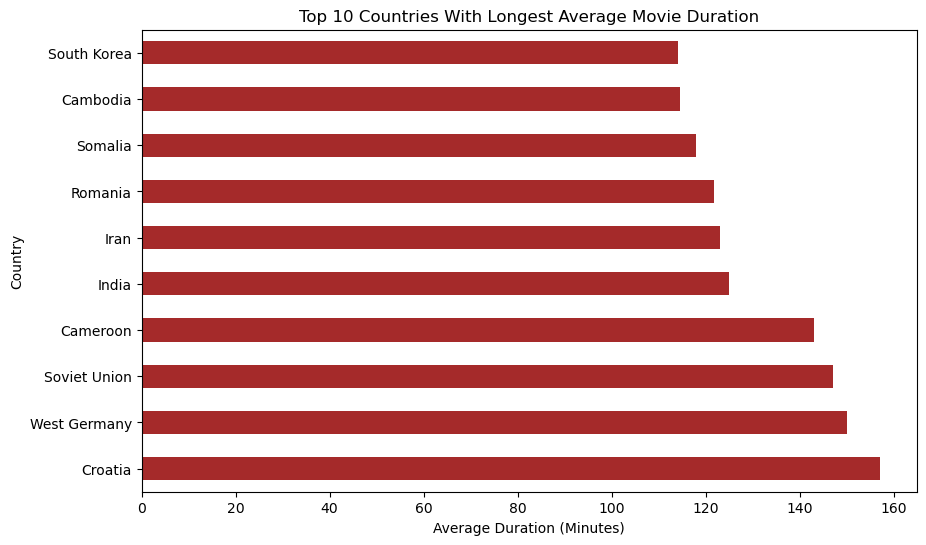

In [39]:
# Group by country and calculate average duration
avg_duration_country = movies.groupby('country')['duration_minutes'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
avg_duration_country.plot(kind='barh',color="brown")
plt.title("Top 10 Countries With Longest Average Movie Duration")
plt.xlabel("Average Duration (Minutes)")
plt.ylabel("Country")
plt.savefig('top_10_countries.png', bbox_inches='tight',dpi=300)
plt.show()
plt.close()


**Some countries like Southh Korea, Cambodia, and Somalia produce longer movies on average. This helps identify regions where movies tend to have more runtime.**

# 4. Seasonal Trend

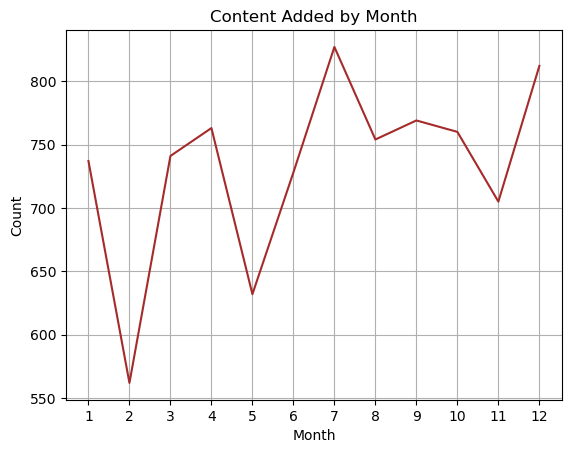

In [40]:
#Which months add the most new content
monthly_add = df['month'].value_counts().sort_index()

plt.plot(monthly_add.index, monthly_add.values,color="brown")
plt.xticks(range(1,13))
plt.title("Content Added by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.savefig('seasonal_trend.png', bbox_inches='tight',dpi=300)
plt.show()
plt.close()


**Netflix adds content throughout the year, but some months like July,August, and December show higher additions.This reveals seasonal upload patterns.**

# 5. Which genre combinations are most common

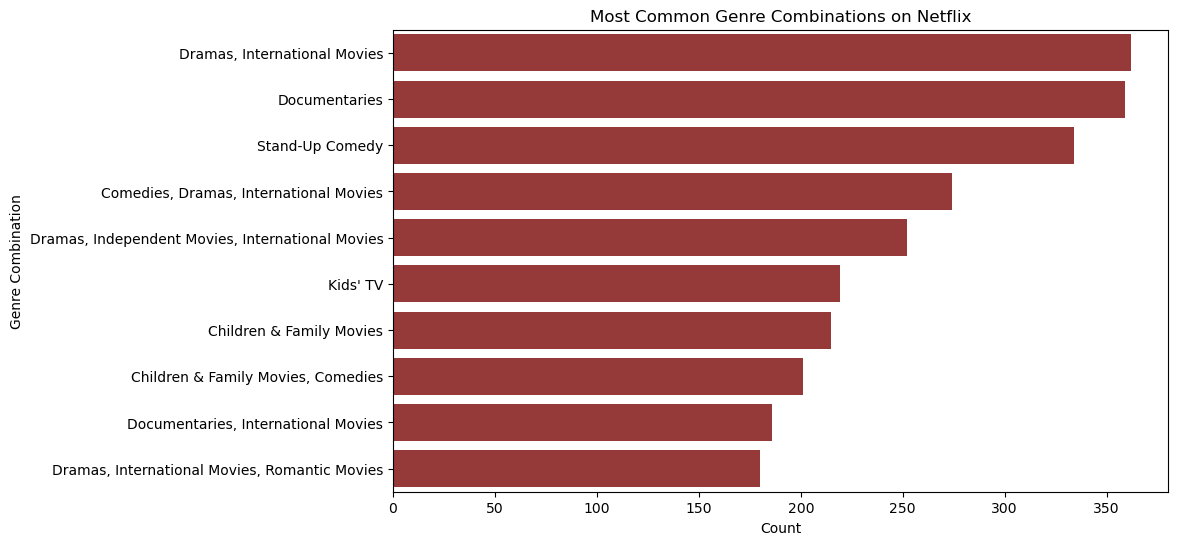

In [41]:
genre_combinations = df['listed_in'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_combinations.values, y=genre_combinations.index,color="brown")
plt.title("Most Common Genre Combinations on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre Combination")
plt.savefig('most_common_genre.png', bbox_inches='tight',dpi=300)
plt.show()
plt.close()


**The bar chart shows that Dramas, International Movies, and Documentaries are the most common genre combinations on Netflix, each appearing in high counts (around 350 titles). This indicates Netflix strongly focuses on dramatic and international content, along with documentary-style shows and movies.**

# 6. How many Netflix titles were released after 2015?

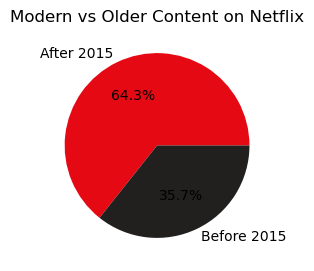

In [42]:
recent = (df['release_year'] > 2015).sum()
older = (df['release_year'] <= 2015).sum()

plt.figure(figsize=(6,3))
plt.pie([recent, older], labels=['After 2015', 'Before 2015'], 
        autopct='%.1f%%', colors=netflix_colors)
plt.title("Modern vs Older Content on Netflix")
plt.savefig('Modern_vs_Older_Content.png', bbox_inches='tight',dpi=300)
plt.show()
plt.close()


**Most of Netflix's catalog was released after 2015.This means the platform mainly focuses on modern and recently produced content.**

In [23]:
netflix_colors = ['#E50914',  # Netflix Red
                  '#221F1F',  # Netflix Black
                  '#F5F5F1',  # Off-White
                  '#B81D24',  # Dark Red
                  '#8B0000',  # Deep Red
                  '#4A4A4A',  # Grey
                  '#CCCCCC',  # Light Grey
                  '#000000']  # Pure Black


# 7. Rating Distribution

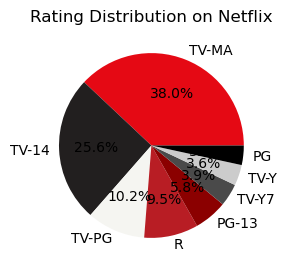

In [43]:
rating_counts = df['rating'].value_counts().head(8)

plt.figure(figsize=(6,3))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%.1f%%', colors=netflix_colors)
plt.title("Rating Distribution on Netflix")
plt.savefig('rating_distribution.png', bbox_inches='tight',dpi=300)
plt.show()
plt.close()

**TV-MA and TV-14 are the most common ratings,showing that Netflix has a lot of mature and teen-friendly content.Other ratings appear in smaller proportions.**

# 8. Modern vs Older Content on Netflix
  ## (Before vs After 2010)

In [44]:
before_2010 = (df['release_year'] < 2010).sum()
after_2010 = (df['release_year'] >= 2010).sum()

plt.figure(figsize=(6,3))
plt.pie([before_2010, after_2010],
        labels=['Before 2010', 'After 2010'],
        autopct='%.1f%%', colors=netflix_colors)
plt.title("Netflix Conent Split by Release Year")
plt.savefig('Modern_vs_Older_Content(2010).png', bbox_inches='tight',dpi=300)
plt.show()
plt.close()

**The pie chart shows that most Netflix titles (around 84.8%) were released after 2010, while only 15.2% were released before 2010. This means Netflix mainly features modern and recent content.**

# Feature Engineering and Additional EDA
## 1: Count number of genres

In [27]:
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(',')))

df[['listed_in', 'num_genres']].head()

listed_in  num_genres
0                                      Documentaries           1
1  Crime TV Shows, International TV Shows, TV Act...           3
2                 TV Dramas, TV Horror, TV Mysteries           3
3                 Children & Family Movies, Comedies           2
4   Dramas, Independent Movies, International Movies           3

In [45]:
plt.figure(figsize=(4,4))
sns.countplot(x='num_genres', data=df, color=netflix_colors[0])
plt.title("Distribution of Number of Genres per Title")
plt.xlabel("Number of Genres")
plt.ylabel("Count")
plt.savefig('Count_number_of_genres.png', bbox_inches='tight',dpi=300)
plt.show()
plt.close()

**This chart shows that most Netflix titles belong to 3 genres, followed by 2 genres, while very few titles have only 1 genre. This means Netflix content usually falls under multiple categories.**

## 2: Calculate how old each title is

In [30]:
current_year = 2024
df['content_age'] = current_year - df['release_year']

# sample output
df[['title', 'release_year', 'content_age']].head()


title  release_year  content_age
0              Dick Johnson Is Dead          2020            4
1                         Ganglands          2021            3
2                     Midnight Mass          2021            3
3  Confessions of an Invisible Girl          2021            3
4                           Sankofa          1993           31

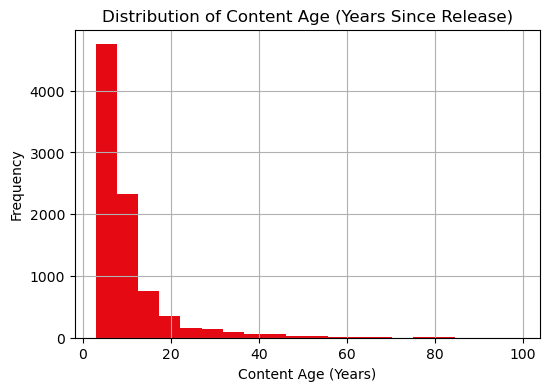

In [46]:
plt.figure(figsize=(6,4))
plt.hist(df['content_age'], bins=20, color='#E50914') 
plt.title("Distribution of Content Age (Years Since Release)")
plt.xlabel("Content Age (Years)")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig('distribution_of_content_age.png', bbox_inches='tight',dpi=300)
plt.show()
plt.close()

**Most Netflix titles are very recent, with the majority released within the last 10 years. Very old titles are less common, which shows Netflix mainly provied modern content.**

## 3: Extract numeric value from duration

In [32]:
df['duration_number'] = df['duration'].str.extract('(\d+)').astype(int)

# Sample output
df[['type', 'duration', 'duration_number']].head()


type  duration  duration_number
0    Movie    90 min               90
1  TV Show  1 Season                1
2  TV Show  1 Season                1
3    Movie    91 min               91
4    Movie   125 min              125

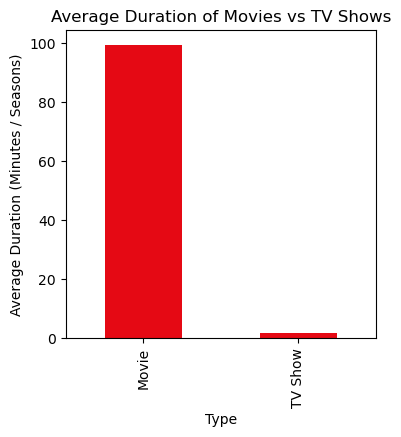

In [47]:
# Group by content type and calculate average duration_number
avg_duration = df.groupby('type')['duration_number'].mean()

# Plot
plt.figure(figsize=(4,4))
avg_duration.plot(kind='bar', color=netflix_colors[0])  
plt.title("Average Duration of Movies vs TV Shows")
plt.ylabel("Average Duration (Minutes / Seasons)")
plt.xlabel("Type")
plt.savefig('.pavg_duration_of_movies_vs_ TV_shows.png', bbox_inches='tight',dpi=300)
plt.show()
plt.close()


**Movies have a much higher average duration (around 100 min), while TV Shows usually have only 1-2 seasons n average. This shows a clear difference in how Netflix structures both content types.**

## Exporting Final Cleaned Dataset

In [34]:
df.to_csv("netflix_cleaned.csv",index=False)

## Key Insights from the Analysis:
--Netflix has more movies than TV Shows.

--Most content is released after 2015.

--TV-MA and TV-14 are the most common ratings.

--Most movies are 80-120 minutes long.

--Genres like Dramas, International Movies, and Documentaries appear the most.

--Content is mostly recent, under 10 years old.

## Conclusion:
This project helped me understand Netflix content by cleaning the data, doing EDA, and creating new features. I found that Netflix has more movies than TV shows, most titles are released after 2010, and genres like Drama and International Movies are the most common. Overall, the dataset shows that Netflix mainly focuses on modern and multi-genre content.